In [1]:
import pandas as pd
import numpy as  np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Zara_Sales_Analysis.csv', sep = ';')

In [3]:
df.head(2)

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN


In [4]:
df.describe()

,Product ID,Sales Volume,price
count,252.000000,252.000000,252.000000
mean,153370.503968,1823.702381,86.252540
std,26160.444549,697.703748,52.083205
min,110075.000000,529.000000,7.990000
25%,131053.750000,1243.000000,49.900000
50%,151681.500000,1839.500000,79.900000
75%,175669.750000,2398.750000,109.000000
max,199631.000000,2989.000000,439.000000


In [5]:
# null check 

df.isnull().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [6]:
df[df['name'].isna()]

# since name is very closely linked to the terms , looking for the records were terms is 'jacket' and price = 129

# df.loc[(df['terms'] == 'jacket')|(df['price'] == 129.0)]

# based on it we could see the closet match of the column data where the name == HOODED DENIM JACKET so inserting it along with the desctiption


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN


In [7]:
# Replace missing 'description' where 'name' is NaN
df.loc[df['name'].isna(), 'description'] = df.loc[df['name'] == 'HOODED DENIM JACKET', 'description'].values[0]

# Replace missing 'name' with 'HOODED DENIM JACKET'
df.loc[df['name'].isna(), 'name'] = 'HOODED DENIM JACKET'


In [9]:
## Removing some of the redunant column and the columns that would not add value to the further analysis 

new_df = df[['Product ID','Product Position','Promotion','Product Category','Seasonal','Sales Volume',
   'name', 'price','terms','section']]

In [10]:
## oultiers check

Q1 = new_df['price'].quantile(0.25)
Q3 = new_df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = new_df[(new_df['price']< Q1 -IQR*1.5) | (new_df['price']> Q3 +IQR*1.5)]
print(f'Len of outliers is {len(outliers)}')

Len of outliers is 4


In [11]:
## dropping the outliers 

new_df = new_df.drop(outliers.index)


In [12]:
# duplicate check

new_df.duplicated().sum()

0

## EDA

In [13]:
## the most popular item and price 

new_df[new_df['price'] == new_df['price'].max()]['name']

67    WOOL BLEND TEXTURED JACKET
Name: name, dtype: object

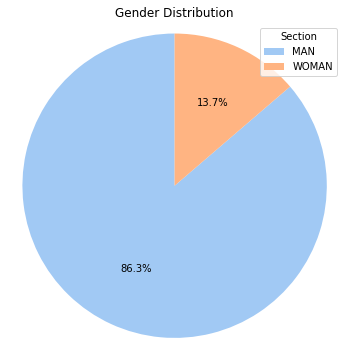

In [14]:
# Man and women distribution 
colors = sns.color_palette('pastel')[0:2]
labels = new_df['section'].value_counts().index

plt.figure(figsize=(6,6))
plt.pie(new_df['section'].value_counts(), colors = colors, autopct= '%1.1f%%', startangle = 90)
plt.title('Gender Distribution')
plt.axis('equal')

plt.legend(labels, title = 'Section')
plt.show()

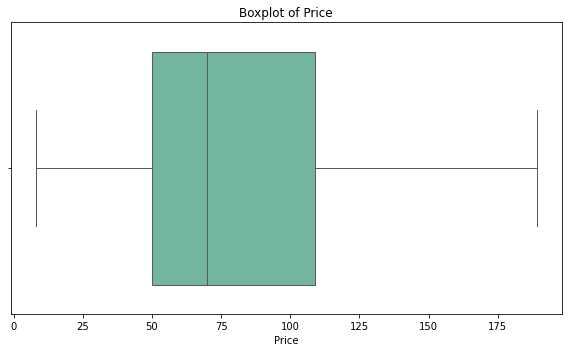

In [15]:
# Plot boxplot for the 'price' column
plt.figure(figsize=(8, 5))
sns.boxplot(x='price', data=new_df, palette='Set2')
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()


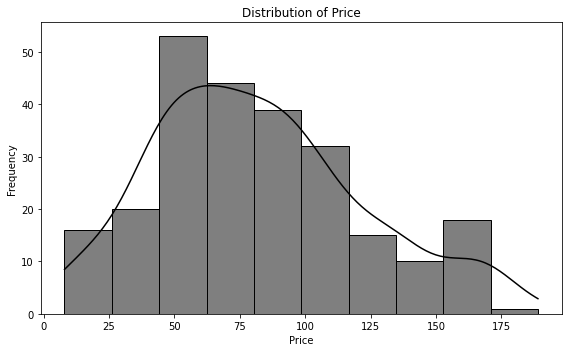

In [16]:
# Histogram with KDE for the 'price' column
plt.figure(figsize=(8, 5))
sns.histplot(data=new_df, x='price', kde=True, color='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

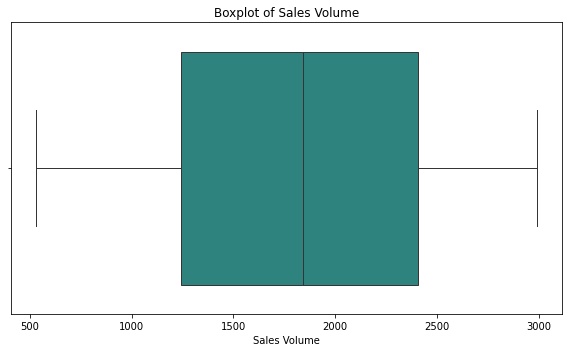

In [17]:
# Boxplot for 'Sales Volume'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sales Volume', data=new_df, palette='viridis')
plt.title('Boxplot of Sales Volume')
plt.xlabel('Sales Volume')
plt.tight_layout()
plt.show()

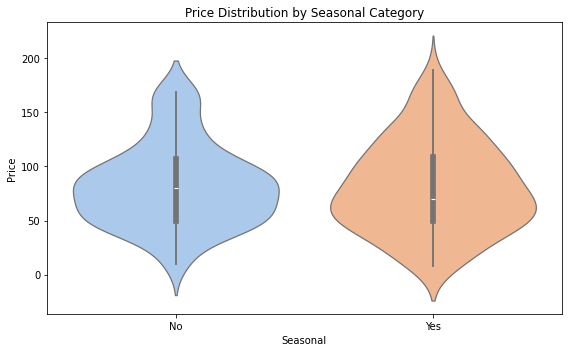

In [18]:
# Violin plot of price by seasonal category
plt.figure(figsize=(8, 5))
sns.violinplot(x='Seasonal', y='price', data=new_df, palette='pastel')
plt.title('Price Distribution by Seasonal Category')
plt.xlabel('Seasonal')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


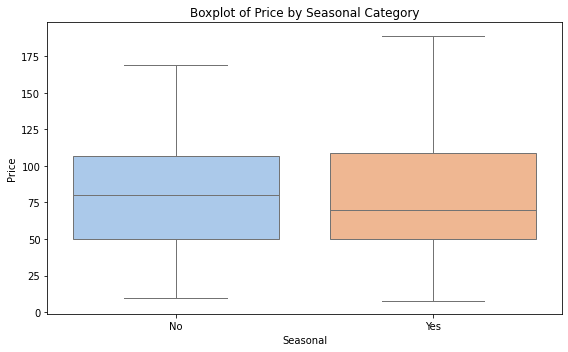

In [19]:
# Boxplot of price by seasonal category
plt.figure(figsize=(8, 5))
sns.boxplot(x='Seasonal', y='price', data=new_df, palette='pastel')
plt.title('Boxplot of Price by Seasonal Category')
plt.xlabel('Seasonal')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

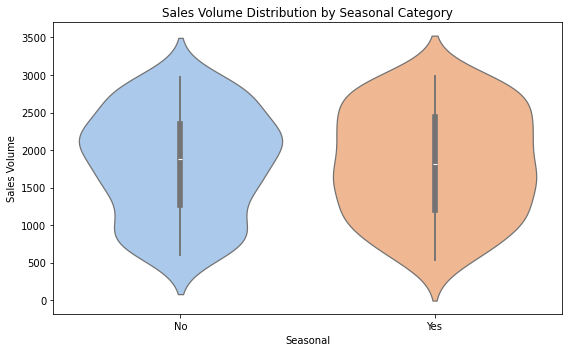

In [25]:
# Violin plot of Sales Volume by Seasonal status
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Seasonal', y='Sales Volume', palette='pastel')
plt.title('Sales Volume Distribution by Seasonal Category')
plt.xlabel('Seasonal')
plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()

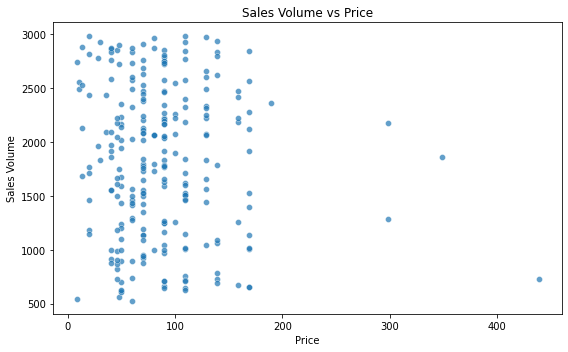

In [26]:
# Scatter plot: Sales Volume vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='price', y='Sales Volume', alpha=0.7)
plt.title('Sales Volume vs Price')
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()

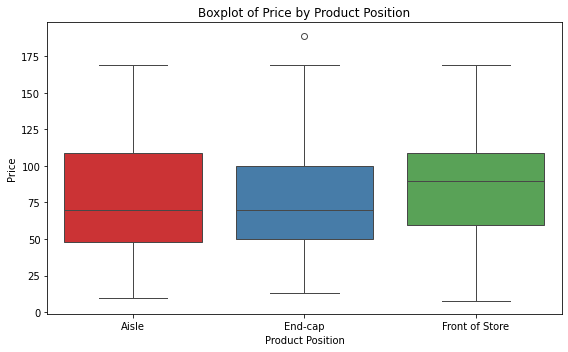

In [20]:
# Boxplot of price by product position
plt.figure(figsize=(8, 5))
sns.boxplot(x='Product Position', y='price', data=new_df, palette='Set1')
plt.title('Boxplot of Price by Product Position')
plt.xlabel('Product Position')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

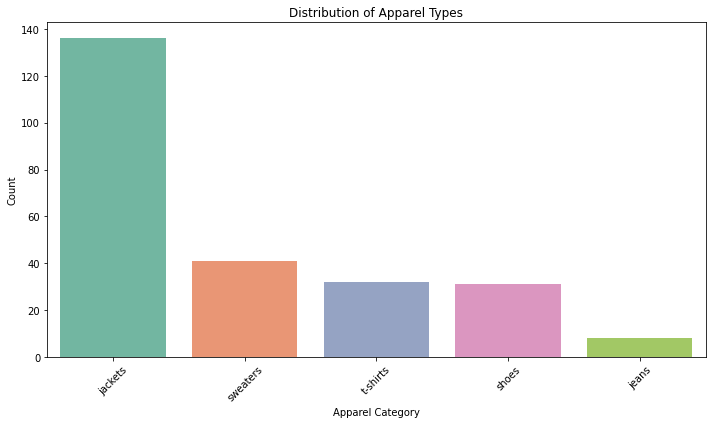

In [21]:
# Bar plot: Distribution of Apparel Types
plt.figure(figsize=(10, 6))
apparel_counts = new_df['terms'].value_counts().sort_values(ascending=False)

sns.barplot(x=apparel_counts.index, y=apparel_counts.values, palette='Set2')
plt.title('Distribution of Apparel Types')
plt.xlabel('Apparel Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [116]:
new_df.groupby(['terms', 'Promotion']).size().reset_index(name='count')


,terms,Promotion,count
0,jackets,No,71
1,jackets,Yes,65
2,jeans,No,5
3,jeans,Yes,3
4,shoes,No,15
5,shoes,Yes,16
6,sweaters,No,23
7,sweaters,Yes,18
8,t-shirts,No,17
9,t-shirts,Yes,15


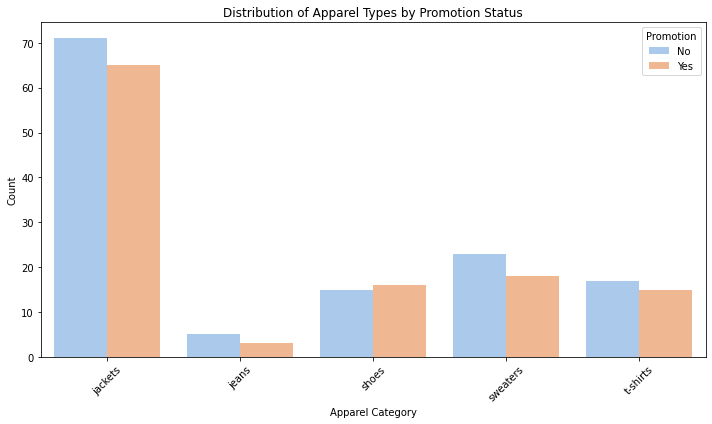

In [22]:
# Grouped data by apparel type and promotion status
grouped_df = new_df.groupby(['terms', 'Promotion']).size().reset_index(name='count')

# Bar plot Apparel type distribution with promotion status
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='terms', y='count', hue='Promotion', palette='pastel')
plt.title('Distribution of Apparel Types by Promotion Status')
plt.xlabel('Apparel Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

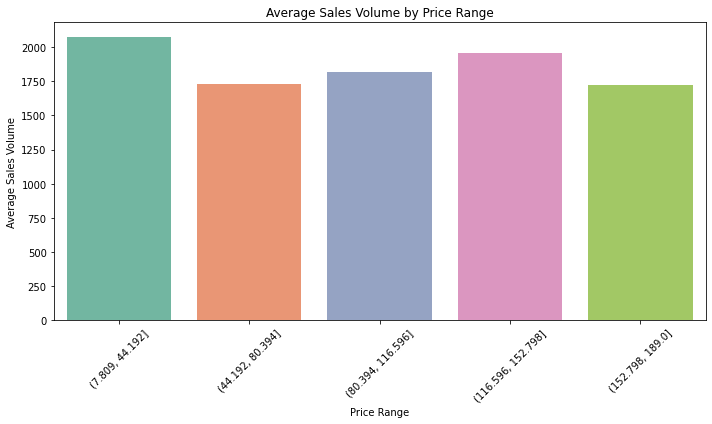

In [23]:
# price bins
new_df['price_bin'] = pd.cut(new_df['price'], bins=5)

# average sales volume per price bin
bin_summary = new_df.groupby('price_bin')['Sales Volume'].mean().reset_index()

# average sales volume by price range
plt.figure(figsize=(10, 6))
sns.barplot(data=bin_summary, x='price_bin', y='Sales Volume', palette='Set2')
plt.title('Average Sales Volume by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Sales Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

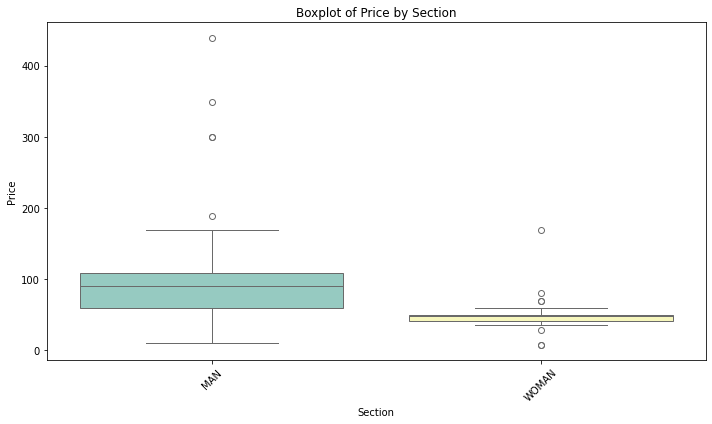

In [24]:
# Boxplot of price by section
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='section', y='price', palette='Set3')
plt.title('Boxplot of Price by Section')
plt.xlabel('Section')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Key metrics

In [28]:
new_df['Total Revenue'] = new_df['Sales Volume']*new_df['price']

In [31]:
new_df['Total Revenue'].sum()

36982074.480000004

In [37]:
## Top 5 best selling products
new_df.groupby('name')['Sales Volume'].sum().sort_values(ascending = False).head(5)

name
PLAID OVERSHIRT                      10910
POCKET OVERSHIRT                      7386
FAUX LEATHER BOMBER JACKET            7197
FAUX LEATHER JACKET                   7113
CONTRASTING PATCHES BOMBER JACKET     7050
Name: Sales Volume, dtype: int64

In [39]:
## Top 5 least sellig products

new_df.groupby('name')['Sales Volume'].sum().sort_values().head(5)


name
ABSTRACT JACQUARD SWEATER        529
HIGH COLLAR KNIT SWEATER         542
V-NECK KNIT SWEATER              558
KNIT OPEN BACK PEARLY SWEATER    606
KNIT SWEATER WITH RIPS           622
Name: Sales Volume, dtype: int64

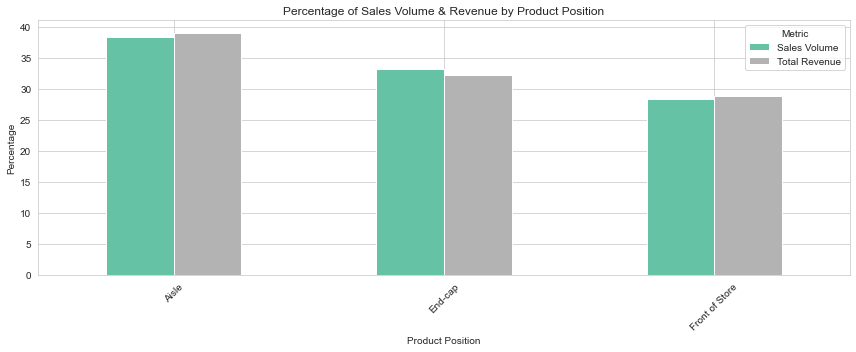

In [48]:
# Group by Product Position and percentage contribution
position_sales = new_df.groupby('Product Position')[['Sales Volume', 'Total Revenue']].sum()
position_sales_percent = position_sales.div(position_sales.sum()) * 100

# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
position_sales_percent.plot(kind='bar', ax=ax, colormap='Set2')

plt.title('Percentage of Sales Volume & Revenue by Product Position')
plt.xlabel('Product Position')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()